# Summary of type of crimes in Chicago Year over Year

In [1]:
#%matplotlib notebook

In [2]:
# Import Dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from scipy import stats


In [3]:
# The path to  CSV file
file = "Chicago_Crimes.csv"

# Read crime data into pandas
crime_data_df = pd.read_csv(file)
crime_data_df.head()

#Slice by required columns
crime_data_by_year_and_type_sample = crime_data_df[['Case Number','Primary Type', 'Year']]

#Sort data 
crime_data_by_year_and_type_sample = crime_data_by_year_and_type_sample.sort_values(by=['Year','Primary Type'])


In [4]:
#find the most prevalent crimes
crime_type = crime_data_by_year_and_type_sample.groupby(['Primary Type'])['Case Number'].count().sort_values(ascending =False).head(10)
prev_crimes = crime_type.index.tolist()

In [5]:
stack_colors = 0
colors = ['blue', 'magenta', 'cyan', 'yellow', 'red', 'green', 'orange', 'lightPink', 'lightBlue', 'lawngreen']

#Define the bar width 
bar_width = 0.4

#Define y co-ordinates for first series 
y_stack_start_pt = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]


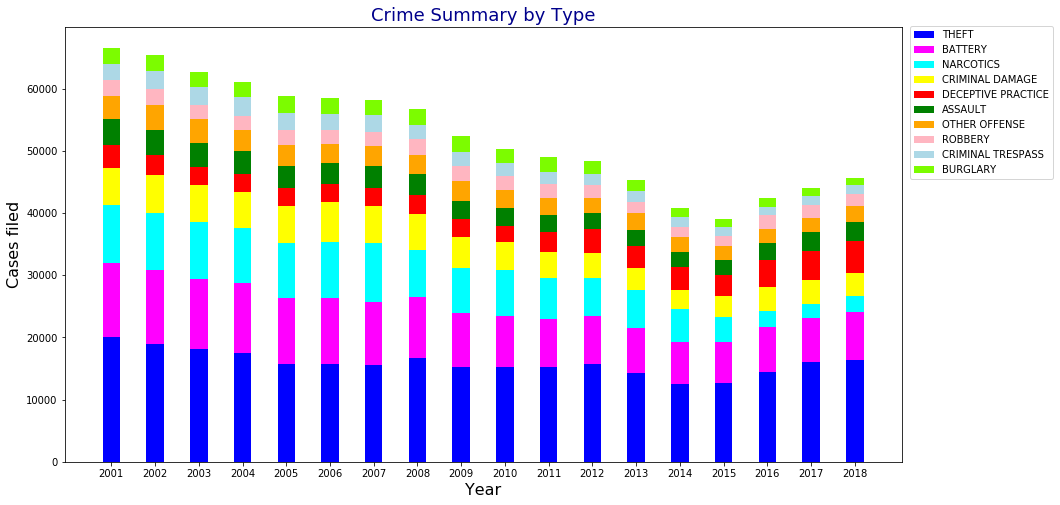

<Figure size 432x288 with 0 Axes>

In [6]:
# Define the Plot size
plt.figure(figsize=(15,8))

# Plot the Stacked Bar Chart for top 10 prevalent crimes 
for row in range(len(prev_crimes)):

    #print(row)
    crime_by_year = crime_data_by_year_and_type_sample.loc[(crime_data_by_year_and_type_sample['Year'] <= 2018) 
                                    & (crime_data_by_year_and_type_sample['Primary Type'] == prev_crimes[row])]
    x_year = crime_by_year['Year'].unique()
    y_crimes = crime_by_year.groupby(['Year', 'Primary Type'])['Case Number'].count()
   
    #print(x_year, y_crimes)
    plt.xticks(x_year)
    if row == 0:
        p = plt.bar(x_year, y_crimes, bar_width, color=colors[stack_colors], label=prev_crimes[row])
    else:
        p = plt.bar(x_year, y_crimes, bar_width, color=colors[stack_colors], label=prev_crimes[row], bottom=y_stack_start_pt)
    
    #Define the Y co-ordinates for each "crime type" series
    y_stack_start_pt = [y_stack_start_pt[i] + y_crimes[i] for i in range(len(y_stack_start_pt))] 
    
    # increment color index
    stack_colors += 1
    
    #print(y_stack_start_pt)

# Chart Legend    

plt.legend(loc=(1.01,0.65)) 

# Label X axis and Y axis
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Cases filed', fontsize = 16)

# Chart Title
plt.title('Crime Summary by Type', fontsize=18, color='darkblue')

# Show Chart
plt.show()
plt.tight_layout()

# Comparision between Current and Prior Year crimes

In [7]:
#Get data for current and prior year 
curr_prior = crime_data_df.loc[(crime_data_df['Year'] >= pd.to_datetime('now').year - 1)]
curr_prior = curr_prior[['Case Number', 'Date', 'Primary Type', 'Year', ]]

# Convert data type of 'Date' column from string to datetime
curr_prior['Date'] = pd.to_datetime(curr_prior['Date'])

In [8]:
# Get the last date of Crime for current year and define the same month and day for prior year
as_of_date_curr_year = curr_prior['Date'].max()
as_of_date_prior_year = dt.datetime(as_of_date_curr_year.year-1, as_of_date_curr_year.month, as_of_date_curr_year.day)

In [9]:
# Data for Current year
curr_ytd_data = curr_prior.loc[(curr_prior['Year'] == pd.to_datetime('now').year)]
curr_ytd_data = curr_ytd_data.sort_values(by=['Primary Type'])

# Data for Prior year
prior_ytd_data = curr_prior.loc[(curr_prior['Year'] == pd.to_datetime('now').year -1) 
                                        & (curr_prior['Date'] <= as_of_date_prior_year) 
                                        & (curr_prior['Primary Type'] != 'HUMAN TRAFFICKING') 
                                        & (curr_prior['Primary Type'] != 'NON-CRIMINAL')]
prior_ytd_data = prior_ytd_data.sort_values(by=['Primary Type'])

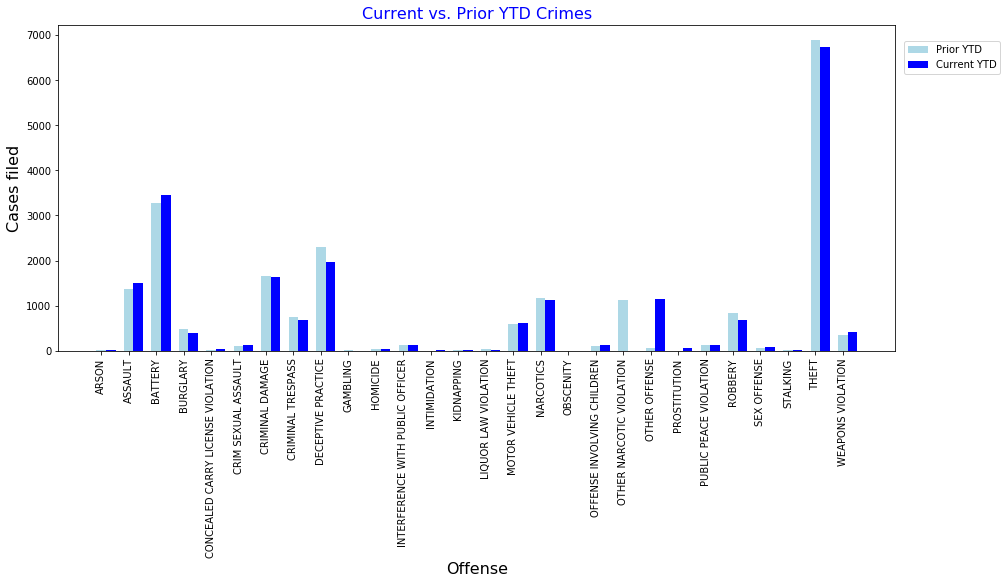

In [10]:
# Define plot size
plt.figure(figsize=(15,6))

# Define x and y coordinates for Prior YTD series
x_prior_year_crimes = prior_ytd_data['Primary Type'].unique()
x_prior_index = np.arange(len(x_prior_year_crimes))
y_prior_year_crimes = prior_ytd_data.groupby(['Primary Type'])['Case Number'].count()

# Define x and y coordinates for Current YTD series
x_curr_year_crimes = curr_ytd_data['Primary Type'].unique()
x_curr_index = np.arange(len(x_curr_year_crimes))
y_curr_year_crimes = curr_ytd_data.groupby(['Primary Type'])['Case Number'].count()

# Plot Prior and Current YTD series
p1=plt.bar(x_prior_index, y_prior_year_crimes, width=0.35, color='lightblue')
p2=plt.bar(x_curr_index+0.35, y_curr_year_crimes, width=0.35, color='blue')

#Replace index numbers with labels
#plt.xticks(x_prior_index, labels=x_curr_prior_crimes, rotation=90)
plt.xticks(x_curr_index, labels=x_curr_year_crimes, rotation=90)
#legend
plt.legend([p1,p2], ['Prior YTD', 'Current YTD'],loc=(1.01,0.85))

#X and Y labels
plt.xlabel('Offense', fontsize = 16)
plt.ylabel('Cases filed', fontsize = 16)

# Chart Title
plt.title('Current vs. Prior YTD Crimes', fontsize = 16, color = 'blue')
#plt.grid()
plt.show()


# The changes of the crimes over the years, the highest and lowest changes since 2001

In [11]:
crime_2001 = crime_data_df.loc[(crime_data_df['Year'] == 2001)].groupby(['Primary Type'])['Case Number'].count()
crime_2018 = crime_data_df.loc[(crime_data_df['Year'] == 2018)].groupby(['Primary Type'])['Case Number'].count()

# Top 5 Lowest change
crime_decrease=((1 - (crime_2018/crime_2001))*100).sort_values(ascending =False).head(5)
crime_decrease = crime_decrease.reset_index()
crime_decrease.index = np.arange(1, len(crime_decrease) + 1)
crime_decrease.columns = ['Type of Offense', '% Decrease']
crime_decrease['% Decrease'] = crime_decrease['% Decrease'].map("{:.2f}%".format)

# Top 5 Highest change
crime_increase=(((1-(crime_2018/crime_2001))*100)).sort_values().head(5).abs()
crime_increase = crime_increase.reset_index()
crime_increase.index= np.arange(1, len(crime_increase) + 1)
crime_increase.columns = ['Type of Offense', '% Increase']
crime_increase[ '% Increase'] = crime_increase["% Increase"].map("{:.2f}%".format)

crime_decrease

,Type of Offense,% Decrease
1,PROSTITUTION,85.25%
2,NARCOTICS,71.52%
3,LIQUOR LAW VIOLATION,67.57%
4,KIDNAPPING,67.24%
5,GAMBLING,63.57%


In [12]:
crime_increase

,Type of Offense,% Increase
1,OBSCENITY,550.00%
2,INTERFERENCE WITH PUBLIC OFFICER,293.24%
3,STALKING,150.00%
4,PUBLIC INDECENCY,150.00%
5,WEAPONS VIOLATION,62.89%
